In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import sqlite3
import numpy as np

In [2]:
# 解决中文乱码问题
mpl.rcParams['font.sans-serif']=['SimSun']
mpl.rcParams['axes.unicode_minus']=False

In [3]:
# 连接数据集
conn = sqlite3.connect('dinofunworld.db')

### question 1

- 游乐园的管理员希望你帮助他们了解游客游览游乐园的不同路线以及他们参加的不同游乐项目。在此任务中，他们随机选择了 5 名游客，并希望你分析这些游客的登记序列。现在，他们希望你针对这 5 名游客构造一个距离矩阵。五名游客的编号为：165316、1835254、296394、404385 和 448990。

<ol>解题思路
<li>创建长宽分别为attractionID的0值矩阵</li>
<li>对sequences进行处理，转化为m-n的数据格式，如：83-33</li>
<li>对m-n数据进行解析：
    <ul>
    <li>m或n为0时，代表用户进入景区、或离开景区，不计入统计</li>
    <li>m与n相等时，代表用户仍然在同一景区游玩，不计入统计</li>
    <li>m与n均不为0，且不相等时，代表用户从m转移到n，计入统计，计数1</li>
    <li>把统计数据填入到之前创建的attractionID的0值矩阵</li>
    </ul>
</li>
<li>使用seaborn.heatmap对矩阵图进行可视化</li>    
</ol>

In [4]:
# 取出景点的id和name
attractionID_sql = """
    SELECT
        AttractionID,
        Name 
    FROM
        attraction;
"""
attractions = pd.read_sql(attractionID_sql,con=conn)

In [7]:
len(attractions['AttractionID'])

71

In [139]:
# 创建71*71的0值数组
matrix = np.zeros((71,71),dtype=int)
matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
# 把上面数组转化为dataframe
df_matrix = pd.DataFrame(matrix,index=attractions['AttractionID'],columns=attractions['AttractionID'])

In [158]:
df_matrix

AttractionID,1,2,3,4,5,6,7,8,9,10,...,62,63,64,65,66,67,81,83,84,85
AttractionID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [217]:
# 取出指定的5个用户游玩序列
sequences_sql = """
    SELECT
        * 
    FROM
        sequences 
    WHERE
        visitorID IN ( '165316', '1835254', '296394', '404385', '448990' );   
"""
sequences = pd.read_sql(sequences_sql,con=conn)
sequences

,index,visitorID,sequence
0,855,165316,0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...
1,1606,296394,0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...
2,2138,404385,0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...
3,2385,448990,0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...
4,9957,1835254,0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...


In [218]:
# 对序列进行分列，以 “-” 为分割点
data = sequences['sequence'].str.split('-',expand=True)
data

,0,1,2,3,4,5,6,7,8,9,...,566,567,568,569,570,571,572,573,574,575
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [219]:
# data转置并过滤掉所有值均为0的行
data = data.T.loc[(data.T != '0').any(axis=1)]
data

,0,1,2,3,4
193,83,0,0,0,0
194,83,0,0,0,0
195,81,0,0,0,0
196,81,0,0,0,0
197,81,0,0,0,0
...,...,...,...,...,...
550,33,0,0,0,0
551,33,0,0,0,0
552,33,0,0,0,0
553,33,0,0,0,0


- 以下代码块到for函数以前，都是过程代码，做题的时候暂没找到更好的解决方案

- https://www.zhihu.com/question/61848369?sort=created

In [220]:
# 对data 的index进行重排
data.reset_index(drop=True,inplace=True)
data

,0,1,2,3,4
0,83,0,0,0,0
1,83,0,0,0,0
2,81,0,0,0,0
3,81,0,0,0,0
4,81,0,0,0,0
...,...,...,...,...,...
346,33,0,0,0,0
347,33,0,0,0,0
348,33,0,0,0,0
349,33,0,0,0,0


In [221]:
# 创建1*5的0值dataframe，辅助矩阵偏移
df_zero = pd.DataFrame([['0','0','0','0','0']])
df_zero

,0,1,2,3,4
0,0,0,0,0,0


In [222]:
# 把1*5的0值矩阵加到序列矩阵的头部
zero_data = pd.concat([df_zero,data],axis=0,ignore_index=True)
zero_data

,0,1,2,3,4
0,0,0,0,0,0
1,83,0,0,0,0
2,83,0,0,0,0
3,81,0,0,0,0
4,81,0,0,0,0
...,...,...,...,...,...
347,33,0,0,0,0
348,33,0,0,0,0
349,33,0,0,0,0
350,33,0,0,0,0


In [223]:
# 把1*5的0值矩阵加到序列矩阵的尾部
data_zero = pd.concat([data,df_zero],axis=0,ignore_index=True)
data_zero

,0,1,2,3,4
0,83,0,0,0,0
1,83,0,0,0,0
2,81,0,0,0,0
3,81,0,0,0,0
4,81,0,0,0,0
...,...,...,...,...,...
347,33,0,0,0,0
348,33,0,0,0,0
349,33,0,0,0,0
350,83,0,0,0,0


In [224]:
# 对偏移处理的矩阵进行相加，形成数据格式为“m-n”的矩阵
data_cor = zero_data + '-' + data_zero
data_cor

,0,1,2,3,4
0,0-83,0-0,0-0,0-0,0-0
1,83-83,0-0,0-0,0-0,0-0
2,83-81,0-0,0-0,0-0,0-0
3,81-81,0-0,0-0,0-0,0-0
4,81-81,0-0,0-0,0-0,0-0
...,...,...,...,...,...
347,33-33,0-0,0-0,0-0,0-0
348,33-33,0-0,0-0,0-0,0-0
349,33-33,0-0,0-0,0-0,0-0
350,33-83,0-0,0-0,0-0,0-0


In [225]:
# 对m-n矩阵进行索引重排
data_cor.reset_index(drop=True,inplace=True)
data_cor

,0,1,2,3,4
0,0-83,0-0,0-0,0-0,0-0
1,83-83,0-0,0-0,0-0,0-0
2,83-81,0-0,0-0,0-0,0-0
3,81-81,0-0,0-0,0-0,0-0
4,81-81,0-0,0-0,0-0,0-0
...,...,...,...,...,...
347,33-33,0-0,0-0,0-0,0-0
348,33-33,0-0,0-0,0-0,0-0
349,33-33,0-0,0-0,0-0,0-0
350,33-83,0-0,0-0,0-0,0-0


In [265]:
# 解析m-n矩阵，并在attractionID的0值矩阵上统计
for i in data_cor.index:
    for j in data_cor.columns:
        record = data_cor[j][i].split('-')
        left = record[0]
        right = record[1]
        if left == '0' or right == '0':
            break
        if left == right:
            break
        if left != right:
            x = int(left)
            y = int(right)
            df_matrix[y][x] += 1

In [272]:
df_matrix.columns = attractions['Name']
df_matrix.index = attractions['Name']

In [279]:
df_matrix

Name,Wrightiraptor Mountain,Galactosaurus Rage,Auvilotops Express,TerrorSaur,Wendisaurus Chase,Keimosaurus Big Spin,Firefall,Atmosfear,North Line,Jeredactyl Jump,...,Liggement Fix-Me-Up,Grinosaurus Stage,SabreTooth Theatre,Darwin's Stop,Tyrannosaurus Rest,Fisching Rooms,Flight of the Swingodon,Campground,Main Entrance,Hotels
Name,,,,,,,,,,,,,,,,,,,,,
Wrightiraptor Mountain,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Galactosaurus Rage,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Auvilotops Express,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TerrorSaur,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wendisaurus Chase,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fisching Rooms,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Flight of the Swingodon,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Campground,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [262]:
import seaborn as sns

<AxesSubplot:xlabel='Name', ylabel='Name'>

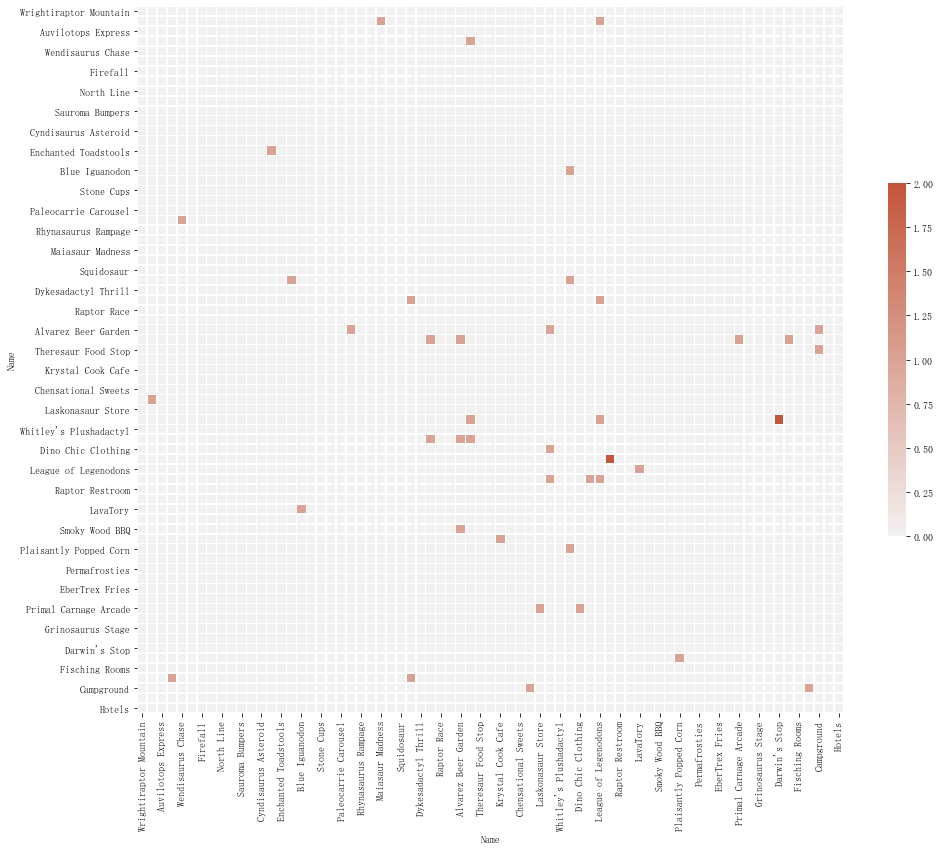

In [284]:
# 使用seaborn.heatmap输出距离矩阵，移动次数越多，颜色越深，去重后，可发现最多为2次
f, ax = plt.subplots(figsize=(16, 13))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df_matrix, cmap=cmap, vmax=2, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### question 2

- 游乐园的管理员想要了解每个游乐项目的参加动态（请注意，并非所有景点都是游乐项目）。他们希望看到一张图(例如平行坐标图)上看到每个游乐项目的最小（非零）参入量、一整天的平均参入量以及每个游乐项目的最大参入量。

In [286]:
visitor_per_day_sql = """
-- 创建visitor_value表作为子查询表
with visitor_value AS (
	SELECT
		a.attraction,
		b.Name,
		a.persons,
		a.date 
	FROM
		(
		SELECT
			attraction,
			date( timestamp ) date,
			count( DISTINCT visitorID ) persons 
		FROM
			checkin 
		GROUP BY
			date( timestamp ),
			attraction 
		ORDER BY
			date( timestamp ),
			count( DISTINCT visitorID ) DESC 
		) a
		LEFT JOIN ( SELECT AttractionID, Name FROM attraction ) b ON a.attraction = b.AttractionID 
	) SELECT
	Name,
	max,
	min,
	avg
FROM
	(
	SELECT
		Name,
		max( persons ) over ( partition BY Name ) max,  -- 求三天最大值
		min( persons ) over ( partition BY Name ) min,  -- 求三天最小值
		avg( persons ) over ( partition BY Name ) avg,  -- 求三天平均值
		ROW_NUMBER( ) over ( partition BY Name ) rowid  -- 用于过滤重复行
	FROM
		visitor_value 
	) a 
WHERE
	rowid = 1
"""
visitor_per_day_df = pd.read_sql(visitor_per_day_sql,con=conn)
visitor_per_day_df

,Name,max,min,avg
0,Alvarez Beer Garden,1834,790,1379.333333
1,Atmosfear,5816,2764,4495.333333
2,Auvilotops Express,4793,2288,3613.000000
3,Beelzebufo,1435,743,1127.000000
4,Blue Iguanodon,1380,703,1063.000000
...,...,...,...,...
66,Wendisaurus Chase,3962,2402,3300.333333
67,Whitley's Plushadactyl,10,1,5.500000
68,Wild Jungle Cruise,1435,793,1166.333333
69,World of WarRocks Shop,3253,1342,2474.333333


In [297]:
visitor_per_day_df.index

RangeIndex(start=0, stop=71, step=1)

In [287]:
from pandas.plotting import parallel_coordinates

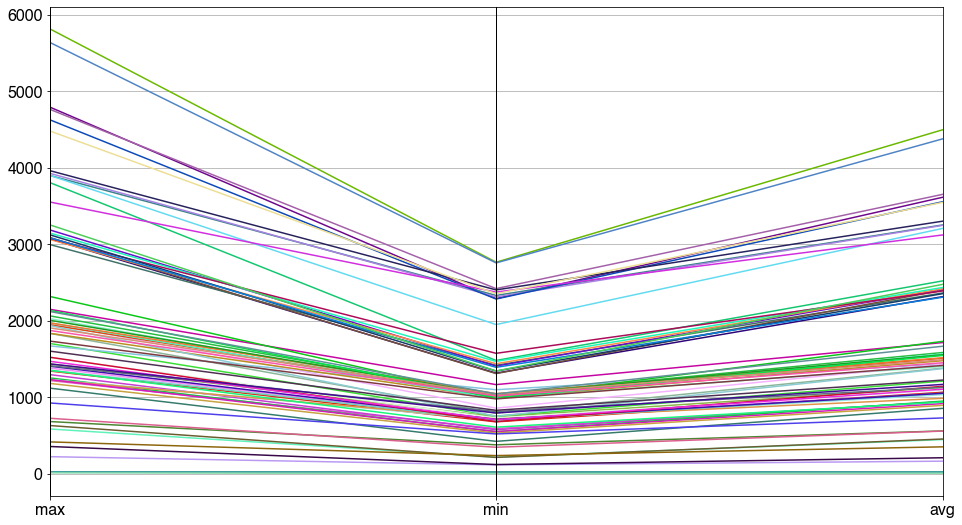

In [294]:
plt.figure(figsize=(16,9))
parallel_coordinates(visitor_per_day_df,'Name')
plt.gca().legend_.remove()
plt.xticks(fontname="Helvetica",fontsize=16)
plt.yticks(fontname="Helvetica",fontsize=16)
plt.show()

### question 3

- 除了平行坐标图，管理员希望看到描述每个游乐项目的最小、平均和最大参入量的散点图矩阵，如上所述。

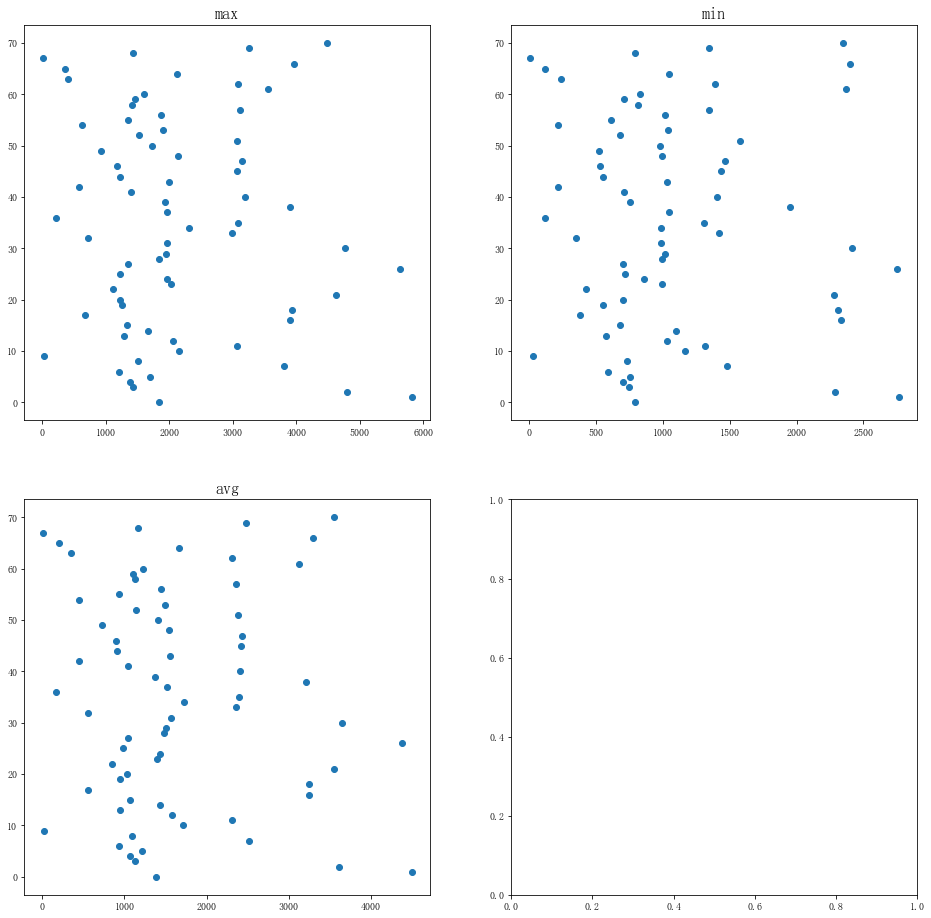

In [355]:
x1 = visitor_per_day_df['max']
x2 = visitor_per_day_df['avg']
x3 = visitor_per_day_df['min']
y = visitor_per_day_df.index

# 出1*3多图时，一直报错，只能出2*2的图形
fig, axs = plt.subplots(2, 2, figsize=(16, 16))
axs[0, 0].scatter(x1,y)
axs[0, 0].set_title('max',fontsize=16)
axs[1, 0].scatter(x2,y)
axs[1, 0].set_title('avg',fontsize=16)
axs[0, 1].scatter(x3,y)
axs[0, 1].set_title('min',fontsize=16)

plt.show()